<a href="https://colab.research.google.com/github/juancuadrado/DOE_2023/blob/main/2_5_Colapsado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos - 2023**

# **Parte I: Experimento $2^{5}$**

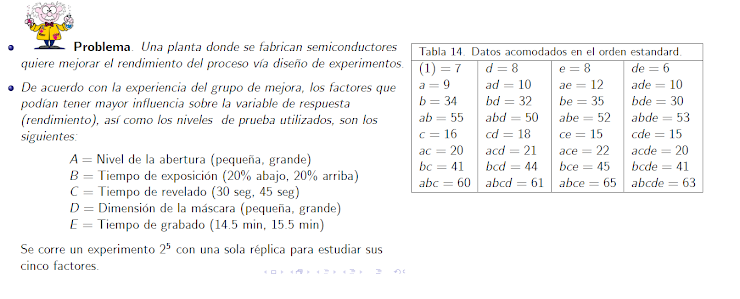


## **2. Librerias**

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import pandas as pd
import statsmodels.api as sm

## **3. Datos**

In [41]:
import pandas as pd

data = {
'A' :[-1, 1]*16,
'B' : list(np.repeat([-1, 1],2))*8,
'C' : list(np.repeat([-1, 1],4))*4,
'D' : list(np.repeat([-1, 1],8))*2,
'E' : np.repeat([-1, 1],16),
'Rendimientos' : [7,	9,	34,	55,	16,	20,	41,	60,	8,	10,	32,	50,	18,	21,	44,	61,	8,	12,	35,	52,	15,	22,	45,	65,	6,	10,	30,	53,	15,	20,	41,	63] }
data = pd.DataFrame(data)
data

,A,B,C,D,E,Rendimientos
0,-1,-1,-1,-1,-1,7
1,1,-1,-1,-1,-1,9
2,-1,1,-1,-1,-1,34
3,1,1,-1,-1,-1,55
4,-1,-1,1,-1,-1,16
5,1,-1,1,-1,-1,20
6,-1,1,1,-1,-1,41
7,1,1,1,-1,-1,60
8,-1,-1,-1,1,-1,8
9,1,-1,-1,1,-1,10


## **4. Nuestro DataFrame**

In [42]:
datos = pd.DataFrame(data)
print(datos)

    A  B  C  D  E  Rendimientos
0  -1 -1 -1 -1 -1             7
1   1 -1 -1 -1 -1             9
2  -1  1 -1 -1 -1            34
3   1  1 -1 -1 -1            55
4  -1 -1  1 -1 -1            16
5   1 -1  1 -1 -1            20
6  -1  1  1 -1 -1            41
7   1  1  1 -1 -1            60
8  -1 -1 -1  1 -1             8
9   1 -1 -1  1 -1            10
10 -1  1 -1  1 -1            32
11  1  1 -1  1 -1            50
12 -1 -1  1  1 -1            18
13  1 -1  1  1 -1            21
14 -1  1  1  1 -1            44
15  1  1  1  1 -1            61
16 -1 -1 -1 -1  1             8
17  1 -1 -1 -1  1            12
18 -1  1 -1 -1  1            35
19  1  1 -1 -1  1            52
20 -1 -1  1 -1  1            15
21  1 -1  1 -1  1            22
22 -1  1  1 -1  1            45
23  1  1  1 -1  1            65
24 -1 -1 -1  1  1             6
25  1 -1 -1  1  1            10
26 -1  1 -1  1  1            30
27  1  1 -1  1  1            53
28 -1 -1  1  1  1            15
29  1 -1  1  1  1            20
30 -1  1

In [43]:
data['AB'] = data['A']*data['B']
data['AC'] = data['A']*data['C']
data['AD'] = data['A']*data['D']
data['AE'] = data['A']*data['E']
data['BC'] = data['B']*data['C']
data['BD'] = data['B']*data['D']
data['BE'] = data['B']*data['E']
data['CD'] = data['C']*data['D']
data['CE'] = data['C']*data['E']
data['DE'] = data['D']*data['E']


In [81]:
names =list(data.columns)
names.remove('Rendimientos')

for i in names:
  x =(data[data[i]==1]['Rendimientos'].sum()-data[~(data[i]==1)]['Rendimientos'].sum())/(2**4)
  print(i,x)

A 11.75
B 34.0
C 9.75
D -0.875
E 0.375
AB 7.875
AC 0.375
AD 0.0
AE 1.0
BC 0.125
BD -0.75
BE 0.5
CD 0.75
CE 0.25
DE -1.125


In [45]:
modelo1 = ols("Rendimientos ~ (A+B+C+D+E)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

            df        sum_sq       mean_sq             F        PR(>F)
A          1.0  1.104500e+03  1.104500e+03  4.825119e+02  2.243576e-13
B          1.0  9.248000e+03  9.248000e+03  4.040082e+03  1.153367e-20
C          1.0  7.605000e+02  7.605000e+02  3.322321e+02  3.982600e-12
D          1.0  6.125000e+00  6.125000e+00  2.675768e+00  1.214028e-01
E          1.0  1.125000e+00  1.125000e+00  4.914676e-01  4.933440e-01
A:B        1.0  4.961250e+02  4.961250e+02  2.167372e+02  1.011190e-10
A:C        1.0  1.125000e+00  1.125000e+00  4.914676e-01  4.933440e-01
A:D        1.0  6.389773e-29  6.389773e-29  2.791437e-29  1.000000e+00
A:E        1.0  8.000000e+00  8.000000e+00  3.494881e+00  7.997349e-02
B:C        1.0  1.250000e-01  1.250000e-01  5.460751e-02  8.181951e-01
B:D        1.0  4.500000e+00  4.500000e+00  1.965870e+00  1.799896e-01
B:E        1.0  2.000000e+00  2.000000e+00  8.737201e-01  3.638213e-01
C:D        1.0  4.500000e+00  4.500000e+00  1.965870e+00  1.799896e-01
C:E   

In [46]:
modelo1.params

Intercept    3.056250e+01
A            5.875000e+00
B            1.700000e+01
C            4.875000e+00
D           -4.375000e-01
E            1.875000e-01
A:B          3.937500e+00
A:C          1.875000e-01
A:D          2.137179e-15
A:E          5.000000e-01
B:C          6.250000e-02
B:D         -3.750000e-01
B:E          2.500000e-01
C:D          3.750000e-01
C:E          1.250000e-01
D:E         -5.625000e-01
dtype: float64

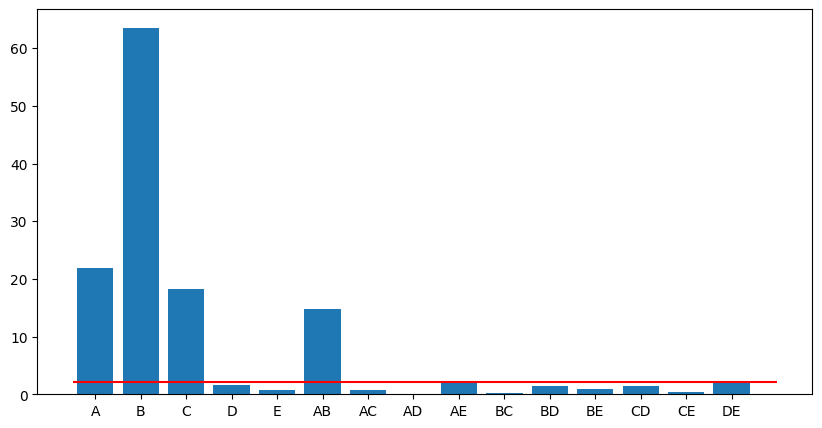

{'A': 21.966154542670672,
 'B': 63.561638676664074,
 'C': 18.22723462051396,
 'D': -1.6357774659435607,
 'E': 0.7010474854043832,
 'AB': 14.721997193492047,
 'AC': 0.7010474854043832,
 'AD': 0.0,
 'AE': 1.869459961078355,
 'BC': 0.2336824951347944,
 'BD': -1.4020949708087664,
 'BE': 0.9347299805391776,
 'CD': 1.4020949708087664,
 'CE': 0.4673649902695888,
 'DE': -2.1031424562131495}

In [47]:
efectos = {}
for name in names:
  efecto = (data['Rendimientos'][data[name]==1].sum()-data['Rendimientos'][data[name]==-1].sum())/(2**4)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(2**3))**0.5

efecto_standarizado = {}

for name in efectos.items():
  efecto_standarizado[name[0]]=name[1]/estimacion_estandar_error

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_standarizado.keys())
values = list(efecto_standarizado.values())

values = [abs(result) for result in values]
plt.figure(figsize=(10,5))
plt.bar(range(len(efecto_standarizado)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=15, y = bars, color='red')
plt.show()
efecto_standarizado

## **5. Grafico de los Efectos principales**


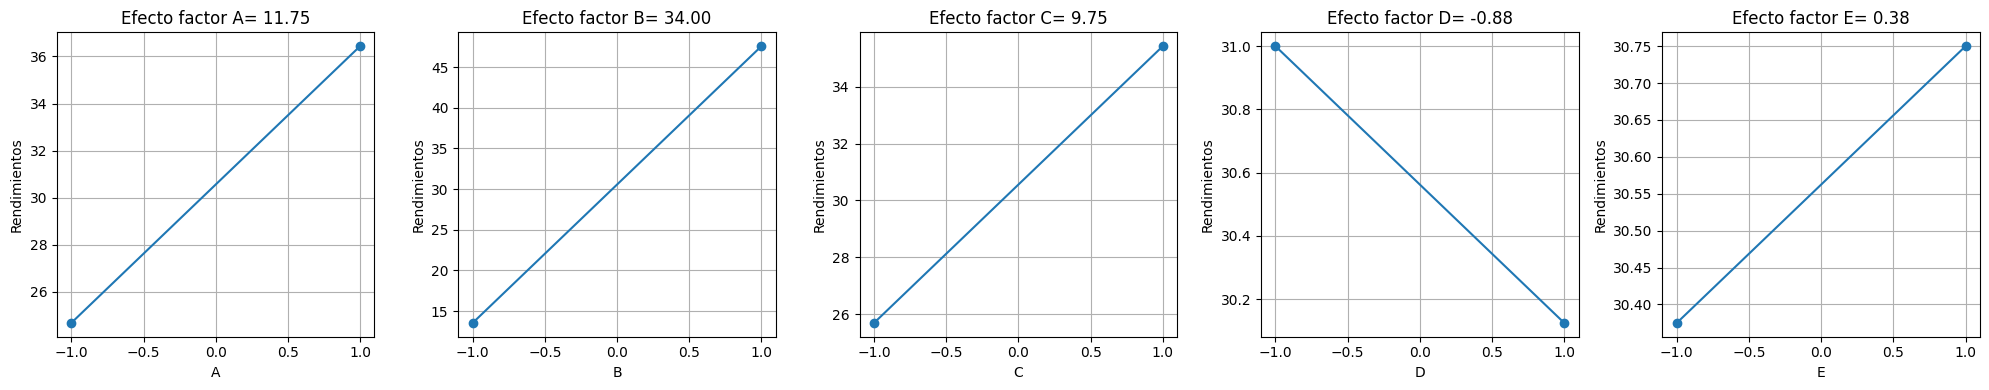

In [48]:
import matplotlib.pyplot as plt

factors = datos.columns[:5]  # Excluyendo la columna 'Rendimientos'

fig, axes = plt.subplots(1, len(factors), figsize=(20, 4))

for i, factor in enumerate(factors):
    df_effect = datos[[factor, 'Rendimientos']].groupby(factor).mean()
   # print(i, df_effect)
    effect_value = (df_effect.loc[1, 'Rendimientos'] - df_effect.loc[-1, 'Rendimientos'])  # Cálculo del efecto
    ax = axes[i]
    ax.plot(df_effect, marker='o')
    ax.set_xlabel(factor)
    ax.set_ylabel('Rendimientos')
    ax.set_title(f'Efecto factor {factor}= {effect_value:.2f}')
    ax.grid(True)

plt.tight_layout()
plt.show()


# **6. Box_PLot**

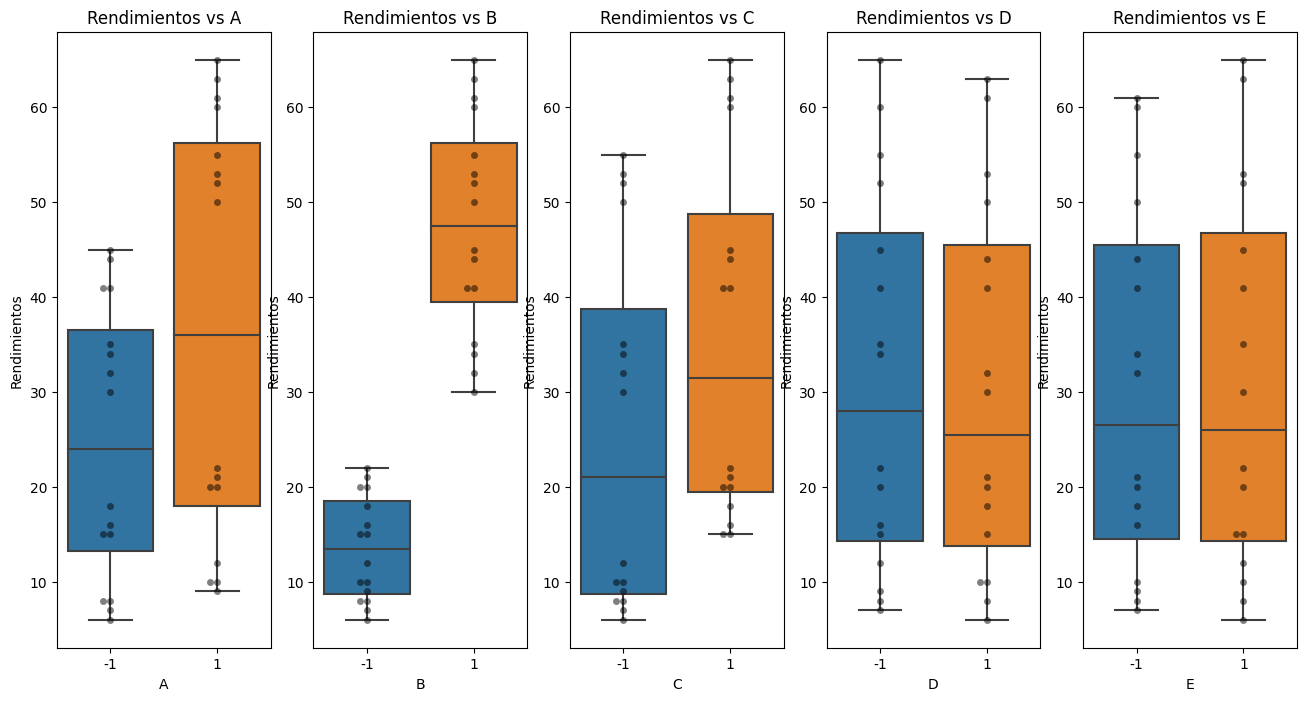

In [79]:
fig, axs = plt.subplots(1, 5, figsize=(16, 8))
axs[0].set_title('Rendimientos vs A')
sns.boxplot(x="A", y="Rendimientos", data=datos, ax=axs[0])
sns.swarmplot(x="A", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Rendimientos vs B')
sns.boxplot(x="B", y="Rendimientos", data=datos, ax=axs[1])
sns.swarmplot(x="B", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[1])
axs[2].set_title('Rendimientos vs C')
sns.boxplot(x="C", y="Rendimientos", data=datos, ax=axs[2])
sns.swarmplot(x="C", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[2])

axs[3].set_title('Rendimientos vs D')
sns.boxplot(x="D", y="Rendimientos", data=datos, ax=axs[3])
sns.swarmplot(x="D", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[3])
axs[4].set_title('Rendimientos vs E')
sns.boxplot(x="E", y="Rendimientos", data=datos, ax=axs[4])
sns.swarmplot(x="E", y="Rendimientos", data=datos, color='black',
              alpha = 0.5, ax=axs[4]);

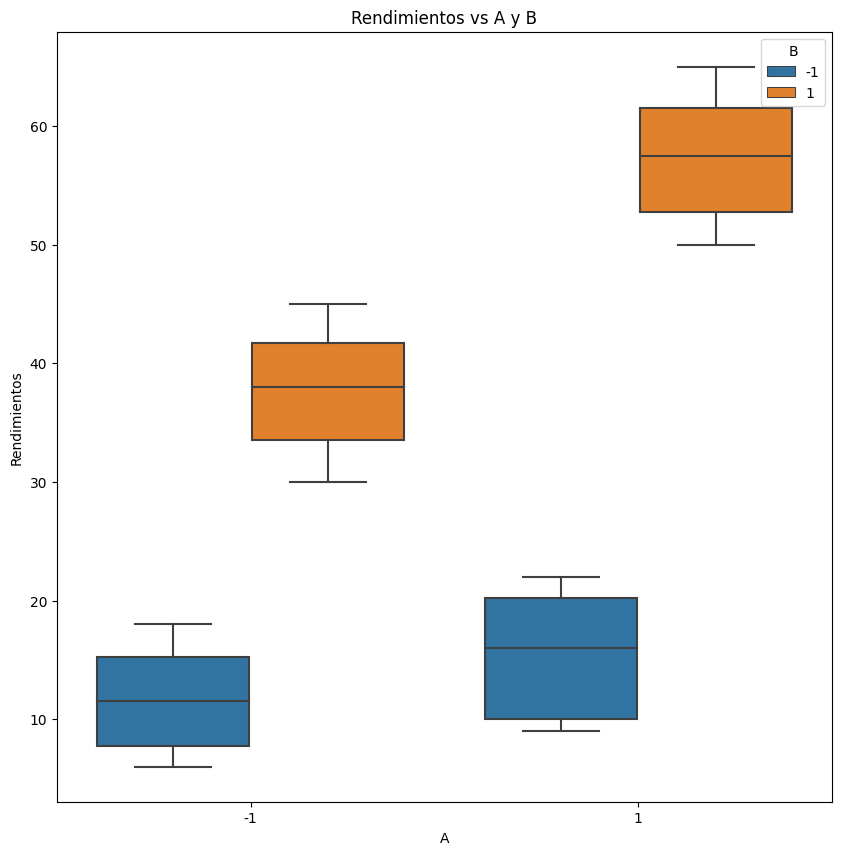

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Rendimientos vs A y B')
sns.boxplot(x="A", y="Rendimientos", hue='B', data=datos,
             ax=ax);

<Axes: title={'center': 'Rendimientos vs A y C'}, xlabel='A', ylabel='Rendimientos'>

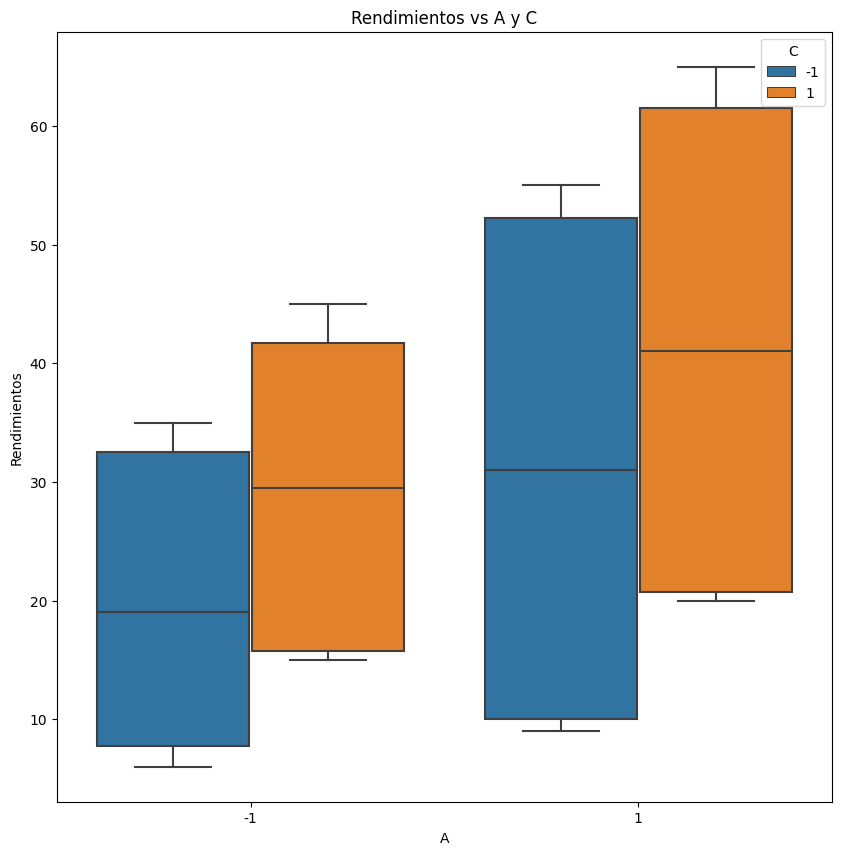

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_title('Rendimientos vs A y C')
sns.boxplot(x="A", y="Rendimientos", hue='C',data=datos,               ax=ax)

# **7. Graficos de interacción**

In [52]:
from statsmodels.graphics.factorplots import interaction_plot

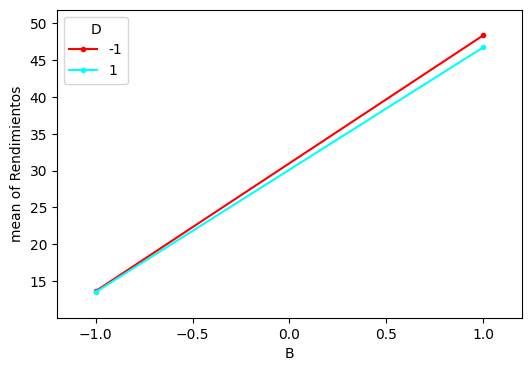

In [53]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.D,
    response = datos.Rendimientos,
    ax       = ax,
)

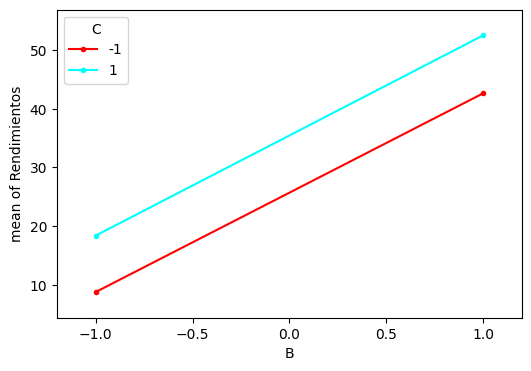

In [54]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.B,
    trace    = datos.C,
    response = datos.Rendimientos,
    ax       = ax,
)

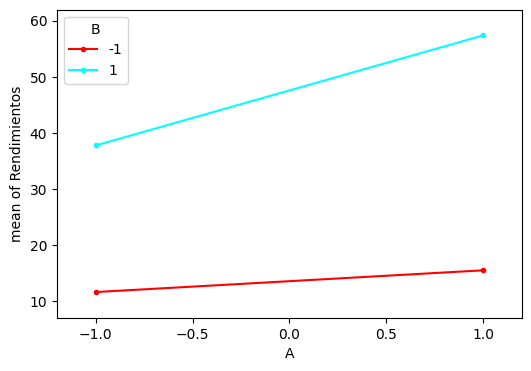

In [55]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.B,
    response = datos.Rendimientos,
    ax       = ax,
)

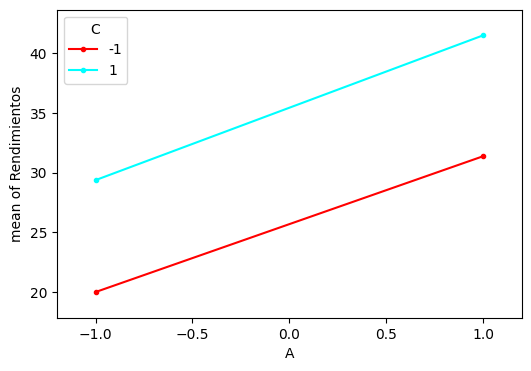

In [56]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.C,
    response = datos.Rendimientos,
    ax       = ax,
)

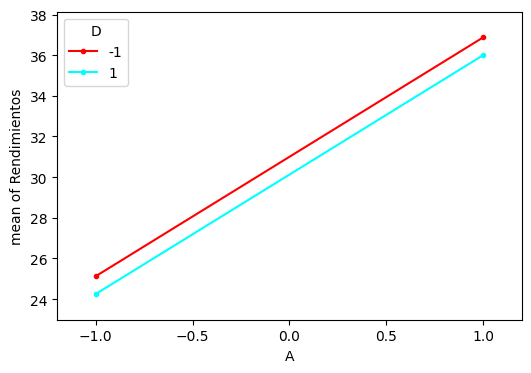

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.D,
    response = datos.Rendimientos,
    ax       = ax,
)

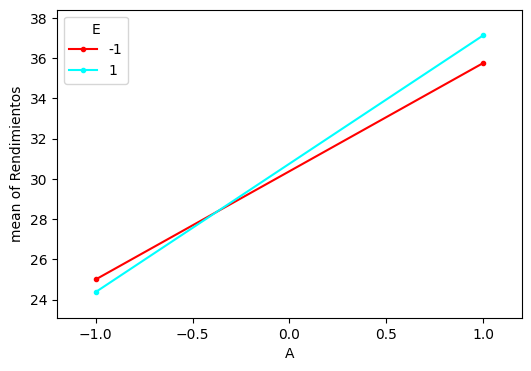

In [58]:
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.A,
    trace    = datos.E,
    response = datos.Rendimientos,
    ax       = ax,
)

In [59]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **a. Anova con los Efectos Principales y las Interacciones Dobles**

In [60]:
modelo1 = ols("Rendimientos ~ (A+B+C+D+E)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo1, typ=1)
print (anova_result)

            df        sum_sq       mean_sq             F        PR(>F)
A          1.0  1.104500e+03  1.104500e+03  4.825119e+02  2.243576e-13
B          1.0  9.248000e+03  9.248000e+03  4.040082e+03  1.153367e-20
C          1.0  7.605000e+02  7.605000e+02  3.322321e+02  3.982600e-12
D          1.0  6.125000e+00  6.125000e+00  2.675768e+00  1.214028e-01
E          1.0  1.125000e+00  1.125000e+00  4.914676e-01  4.933440e-01
A:B        1.0  4.961250e+02  4.961250e+02  2.167372e+02  1.011190e-10
A:C        1.0  1.125000e+00  1.125000e+00  4.914676e-01  4.933440e-01
A:D        1.0  6.389773e-29  6.389773e-29  2.791437e-29  1.000000e+00
A:E        1.0  8.000000e+00  8.000000e+00  3.494881e+00  7.997349e-02
B:C        1.0  1.250000e-01  1.250000e-01  5.460751e-02  8.181951e-01
B:D        1.0  4.500000e+00  4.500000e+00  1.965870e+00  1.799896e-01
B:E        1.0  2.000000e+00  2.000000e+00  8.737201e-01  3.638213e-01
C:D        1.0  4.500000e+00  4.500000e+00  1.965870e+00  1.799896e-01
C:E   

In [61]:
anova_result

,df,sum_sq,mean_sq,F,PR(>F)
A,1.0,1.104500e+03,1.104500e+03,4.825119e+02,2.243576e-13
B,1.0,9.248000e+03,9.248000e+03,4.040082e+03,1.153367e-20
C,1.0,7.605000e+02,7.605000e+02,3.322321e+02,3.982600e-12
D,1.0,6.125000e+00,6.125000e+00,2.675768e+00,1.214028e-01
E,1.0,1.125000e+00,1.125000e+00,4.914676e-01,4.933440e-01
A:B,1.0,4.961250e+02,4.961250e+02,2.167372e+02,1.011190e-10
A:C,1.0,1.125000e+00,1.125000e+00,4.914676e-01,4.933440e-01
A:D,1.0,6.389773e-29,6.389773e-29,2.791437e-29,1.000000e+00
A:E,1.0,8.000000e+00,8.000000e+00,3.494881e+00,7.997349e-02
B:C,1.0,1.250000e-01,1.250000e-01,5.460751e-02,8.181951e-01


In [62]:
!pip install texttable &>/dev/null
from texttable import Texttable

t1 = Texttable()
b0, A, B, C, D, E, AB, AC, AD, AE, BC, BD, BE, CD, CE, DE= modelo1.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['A',	A ],
           ['B',	B ],
           ['C',	C ],
           ['D',	D ],
           ['E',	E ],
           ['AB',AB],
           ['AC',AC],
           ['AD',AD],
           ['AE',AE],
           ['BC',BC],
           ['BD',BD],
           ['BE',BE],
           ['CD',CD],
           ['CE',CE],
           ['DE',DE]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.563                       |
+----------------+------------------------------+
| A              | 5.875                        |
+----------------+------------------------------+
| B              | 17                           |
+----------------+------------------------------+
| C              | 4.875                        |
+----------------+------------------------------+
| D              | -0.438                       |
+----------------+------------------------------+
| E              | 0.188                        |
+----------------+------------------------------+
| AB             | 3.937                        |
+----------------+------------------------------+
| AC             | 0.188                        |
+----------------+------------------------------+
| AD             | 0.000                        |


In [63]:
from scipy.optimize import minimize
# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+A*x[0] + B*x[1] + C*x[2] + D*x[3] + E*x[4] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3]+ AE*x[0]*x[4]+ BC*x[1]*x[2]+ BD*x[1]*x[3]+ BE*x[1]*x[4] + CD*x[2]*x[3]+ CE*x[2]*x[4] + DE*x[3]*x[4])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3], x[4]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1, 1, 1, -1, 1]
Valor Máximo: 63.56250000000054


In [64]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return (b0+ A*x[0] + B*x[1] + C*x[2] + D*x[3] + E*x[4] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3]+ AE*x[0]*x[4]+ BC*x[1]*x[2]+ BD*x[1]*x[3]+ BE*x[1]*x[4] + CD*x[2]*x[3]+ CE*x[2]*x[4] + DE*x[3]*x[4])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3], x[4]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Minimo:", res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [-1, -1, -1, 1, 1]
Valor Minimo: 29.749999999981643


In [65]:
modelo2 = sm.OLS.from_formula('Rendimientos ~ (A+B+C+D+E)**2', data=datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           Rendimientos   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     339.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           4.06e-17
Time:                        22:13:04   Log-Likelihood:                -47.566
No. Observations:                  32   AIC:                             127.1
Df Residuals:                      16   BIC:                             150.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5625      0.267    114.271      0.0

# **9. El anova con todos los efectos - Colapsando el Factor E**

In [66]:
modelo3 = ols("Rendimientos ~ (A+B+C+D)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo3, typ=1)
print (anova_result)

            df        sum_sq       mean_sq             F        PR(>F)
A          1.0  1.104500e+03  1.104500e+03  3.973362e+02  4.009946e-15
B          1.0  9.248000e+03  9.248000e+03  3.326904e+03  1.288535e-24
C          1.0  7.605000e+02  7.605000e+02  2.735846e+02  1.610202e-13
D          1.0  6.125000e+00  6.125000e+00  2.203426e+00  1.525605e-01
A:B        1.0  4.961250e+02  4.961250e+02  1.784775e+02  9.818314e-12
A:C        1.0  1.125000e+00  1.125000e+00  4.047109e-01  5.315394e-01
A:D        1.0  3.818087e-28  3.818087e-28  1.373530e-28  1.000000e+00
B:C        1.0  1.250000e-01  1.250000e-01  4.496788e-02  8.341078e-01
B:D        1.0  4.500000e+00  4.500000e+00  1.618844e+00  2.171615e-01
C:D        1.0  4.500000e+00  4.500000e+00  1.618844e+00  2.171615e-01
Residual  21.0  5.837500e+01  2.779762e+00           NaN           NaN


In [67]:
modelo3 = sm.OLS.from_formula('Rendimientos ~ (A+B+C+D)**2', data=datos).fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:           Rendimientos   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     418.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           7.89e-22
Time:                        22:13:04   Log-Likelihood:                -55.024
No. Observations:                  32   AIC:                             132.0
Df Residuals:                      21   BIC:                             148.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5625      0.295    103.696      0.0

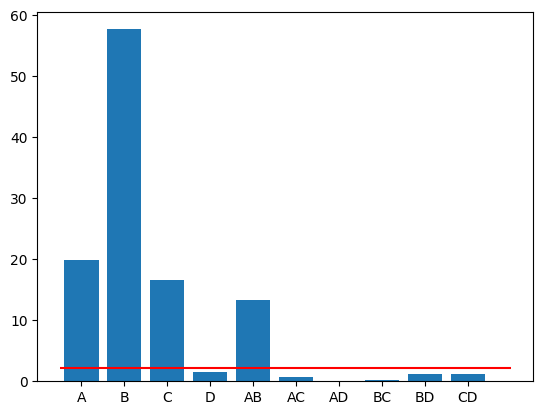

{'A': 19.933293466881757,
 'B': 57.679317265870615,
 'C': 16.540392451242308,
 'D': -1.4843941943422585,
 'AB': 13.359547749080326,
 'AC': 0.6361689404323965,
 'AD': 0.0,
 'BC': 0.2120563134774655,
 'BD': -1.272337880864793,
 'CD': 1.272337880864793}

In [68]:
names = ['A','B','C','D','AB','AC','AD','BC','BD','CD']

efectos = {}
for name in names:
  efecto = (data['Rendimientos'][data[name]==1].sum()-data['Rendimientos'][data[name]==-1].sum())/(2**4)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(2**3))**0.5

efecto_standarizado = {}

for name in efectos.items():
  efecto_standarizado[name[0]]=name[1]/estimacion_estandar_error

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_standarizado.keys())
values = list(efecto_standarizado.values())

values = [abs(result) for result in values]

plt.bar(range(len(efecto_standarizado)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=10, y = bars, color='red')
plt.show()
efecto_standarizado

In [69]:
t1 = Texttable()
b0, A, B, C, D, AB, AC, AD, BC, BD, CD= modelo3.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['A',	A ],
           ['B',	B],
           ['C',	C ],
           ['D',	D ],
           ['AB', AB],
           ['AC', AC],
           ['AD', AD],
           ['BC', BC],
           ['BD', BD],
           ['CD', CD],
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.563                       |
+----------------+------------------------------+
| A              | 5.875                        |
+----------------+------------------------------+
| B              | 17.000                       |
+----------------+------------------------------+
| C              | 4.875                        |
+----------------+------------------------------+
| D              | -0.438                       |
+----------------+------------------------------+
| AB             | 3.938                        |
+----------------+------------------------------+
| AC             | 0.188                        |
+----------------+------------------------------+
| AD             | 0.000                        |
+----------------+------------------------------+
| BC             | 0.063                        |


In [70]:
from scipy.optimize import minimize
# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+A*x[0] + B*x[1] + C*x[2] + D*x[3] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3] + BC*x[1]*x[2] + BD*x[1]*x[3] + CD*x[2]*x[3])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1, 1, 1, -1]
Valor Máximo: 62.50000000000002


In [71]:
from scipy.optimize import minimize
# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return (b0+A*x[0] + B*x[1] + C*x[2] + D*x[3] + AB*x[0]*x[1] + AC*x[0]*x[2] + AD*x[0]*x[3] + BC*x[1]*x[2] + BD*x[1]*x[3] + CD*x[2]*x[3])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2], x[3]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Minimo:", res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [-1, -1, -1, 1]
Valor Minimo: 30.12499999998904


# **10. El anova con todos los efectos - Colapsando otro Factor - el Factor D**

In [72]:
modelo4 = ols("Rendimientos ~ (A+B+C)**2", data = datos).fit()
anova_result = sm.stats.anova_lm(modelo4, typ=1)
print (anova_result)

            df    sum_sq   mean_sq            F        PR(>F)
A          1.0  1104.500  1104.500   375.680272  1.415237e-16
B          1.0  9248.000  9248.000  3145.578231  8.132774e-28
C          1.0   760.500   760.500   258.673469  1.074325e-14
A:B        1.0   496.125   496.125   168.750000  1.288256e-12
A:C        1.0     1.125     1.125     0.382653  5.417825e-01
B:C        1.0     0.125     0.125     0.042517  8.383074e-01
Residual  25.0    73.500     2.940          NaN           NaN


In [73]:
modelo4 = sm.OLS.from_formula('Rendimientos ~ (A+B+C)**2', data=datos).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:           Rendimientos   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     339.2
Date:                Sun, 19 Nov 2023   Prob (F-statistic):           4.06e-17
Time:                        22:13:05   Log-Likelihood:                -47.566
No. Observations:                  32   AIC:                             127.1
Df Residuals:                      16   BIC:                             150.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.5625      0.267    114.271      0.0

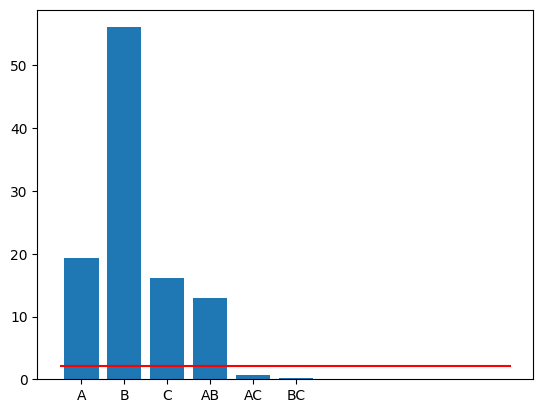

{'A': 19.38247332279458,
 'B': 56.08545472127794,
 'C': 16.083328927425292,
 'AB': 12.990381056766582,
 'AC': 0.618589574131742,
 'BC': 0.20619652471058067}

In [74]:
names = ['A','B','C','AB','AC','BC']

efectos = {}
for name in names:
  efecto = (data['Rendimientos'][data[name]==1].sum()-data['Rendimientos'][data[name]==-1].sum())/(2**4)
  efectos[name] = efecto

estimacion_estandar_error = (anova_result['mean_sq'].Residual/(2**3))**0.5

efecto_standarizado = {}

for name in efectos.items():
  efecto_standarizado[name[0]]=name[1]/estimacion_estandar_error

bars = 2.1199053

#plt.plot(efecto_standarizado)

names = list(efecto_standarizado.keys())
values = list(efecto_standarizado.values())

values = [abs(result) for result in values]

plt.bar(range(len(efecto_standarizado)), values, tick_label=names)
plt.hlines(xmin=-0.5, xmax=10, y = bars, color='red')
plt.show()
efecto_standarizado

# **11. Encontrando el óptimo**

In [75]:
modelo4.params

Intercept    30.5625
A             5.8750
B            17.0000
C             4.8750
A:B           3.9375
A:C           0.1875
B:C           0.0625
dtype: float64

In [76]:
#!pip install texttable &>/dev/null
#from texttable import Texttable

t1 = Texttable()
b0, A, B, C, AB, AC, BC= modelo4.params
# Tabla Resumen

t1.add_rows([['Parametro = bi','valor de bi para el modelo 1' ],
           ['b0',	b0],
           ['A',	A ],
           ['B',	B ],
           ['C',	C ],
           ['AB',AB ],
           ['AC',AC ],
           ['BC',BC ]
           ])
print(t1.draw())

+----------------+------------------------------+
| Parametro = bi | valor de bi para el modelo 1 |
+================+==============================+
| b0             | 30.563                       |
+----------------+------------------------------+
| A              | 5.875                        |
+----------------+------------------------------+
| B              | 17.000                       |
+----------------+------------------------------+
| C              | 4.875                        |
+----------------+------------------------------+
| AB             | 3.938                        |
+----------------+------------------------------+
| AC             | 0.188                        |
+----------------+------------------------------+
| BC             | 0.063                        |
+----------------+------------------------------+


In [77]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return -(b0+A*x[0] + B*x[1] + C*x[2] + AB*x[0]*x[1] + AC*x[0]*x[2] + BC*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Máximo:", -res.fun)  # Como minimizamos el negativo de la función


Resultado óptimo:
x: [1, 1, 1]
Valor Máximo: 62.500000000000014


In [78]:
from scipy.optimize import minimize

# Define la función que deseas maximizar se antepone el signo (-)
def funcion(x):
    return (b0+A*x[0] + B*x[1] + C*x[2] + AB*x[0]*x[1] + AC*x[0]*x[2] + BC*x[1]*x[2])

# Define las restricciones para x
def variables(x):
    return x[0], x[1], x[2]

# Definir las restricciones de límite para x
restricciones = [(-1, 1), (-1, 1), (-1, 1)]

# Suprimir la Bida de la optimización
res = minimize(funcion, [0, 0, 0], method='SLSQP', constraints={'type':'ineq', 'fun': variables}, bounds=restricciones)

# Imprimir el resultado
print("Resultado óptimo:")
print("x:", [2*round(i)-1 for i in res.x])
print("Valor Minimo:", res.fun)  # Como minimizamos el negativo de la función

Resultado óptimo:
x: [-1, -1, -1]
Valor Minimo: 30.562500000000007
